# Assignment 3

### MACS 30000, Dr. Evans
### Ruixi Li

Due Wednesday, Oct. 24 at 11:30 AM

## Question 1

<br>
Simulations are widely used in sociology. Techniques like system dynamics, multiagent systems, cellular automata and genetic algorithms have developed in the progress. When constructing a simulation system for mapping theory to practice, the crucial characteristic of the model is matching the real-world, validity in other words. However, some techniques may fail to achieve that. 

**Two limitations of multiagent system and cellular automata**

Multi-agent systems and cellular automata bear some potential weakness in validity. 

For multiagent systems, Moretti (2002) believes that the following three aspects need further research. First, using theories and models concerning rationality that are realistic, understandable, and can be applied in the case of limited knowledge. In particular, theories of rationality need to be extended to learning and adaptation. Second, formalizing all the aspects of psychological theories, such as emotions, motivations, desire,intent, consciousness. Third, formalizing all types of knowledge by determine the possibility of it and the best way to acheive that.

For cellular automata, Moretti (2002) proposed two limitations for the approach. Firstly, this approach sync data at the same time. However, agents make decisions and modify their choice at different time. Evidence found that the operation order has great effect on the turnout. Therefore, arbitrarily conclude that actions in the period between two syncing happened together is dangerous. Secondly, the neighborhood of a unit is hard to define. This approach restricts each individual interacts only with a subset of the whole population which is reasonably. The problem is how to define the boundary. Back in old day, we may define the boundary by geographic location. Nowadays, with the invention of Internet, interactions can take place between two individuals on the opposite side of the earth. Consequently, it is difficult to set the line on neighborhood.

**Model with feature of dynamic feedback**

Except for this two system, there is another system called “genetic algorithm” which present a feature of “dynamic feedback”. That is to say, the result of the initial inputs will be added to inputs for next round of simulation. Genetic algorithm is based on Darwin’s theory of evolution. According to this theory, a species evolves in relation to its own capacity to adapt to the natural and complex environment. In Darwin's theory of evolution, the result of the initial inputs is stored in the chromsome of a species which can be passed on to next generation. Then, next generation will behave with the information saved in their chromsome in order to avoid repetitive mistakes. Genetic algorithm is applied to two fields in sociology: game theory and cultural evolution. For further illustration, Moretti (2002) cited a model from cultural evolution. Lustick (2000) apply genetic algorithm model to culture transmission, they study “how cultures emerge and transform out of vast number of micro-interactions entailing the diffusion or disappearance of cultural fragment”. 

**Example in political science**

In political science, examples of dynamic feedback are easy to spot. During elections, advertisements of president candidates is made in different stages. Normally, after the first round advertisement, the candidate group will collect information and feedbacks of the ads. Then, after analyzing the data, they will choose the proper content and position for the second round of advertisement. It is the same with third round and fourth round, etc. That is to say, the current choice is based on the current information, but not the starting-stage information. So the advertisement during elections exhibits dynamic feedback.

**Reference**

Moretti, Sabrina, "Computer Simulation in Sociology: What Contribution?" Social Science Computer Review, 20:1 (Spring 2002), pp. 43-57.

## Question 2

In [1]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

ModuleNotFoundError: No module named 'numpy'

In [2]:
def students_income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc0'        : 80000,       #average starting income (t = 2018) for a MACSS student
        'g'           : 0.025,       #income growth rate
        'dep'         : 0.4,         #positive dependence of today’s income on last period’s income
        'st_year'     : 2018,        #starting year
        'lf_years'    : 40,          #years to work
        'num_draws'   : 10000        #simulations
        'sd'          : 0.13         #standard error
    }
    """    

    #set random seed
    np.random.seed(524)
    
    #create an error term
    ln_errors = np.random.normal(0, p['sd'], (p['lf_years'], p['num_draws']))
    
    #create a matrix of dim (lf_years, num_draws)
    ln_inc_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the matrix
    ln_inc_mat[0, :] = np.log(p['inc0']) + ln_errors[0, :]

    #loop and apply model
    for yr in np.arange(1, p['lf_years']):
        ln_inc_mat[yr, :] = (1 - p['dep'])* (np.log(p['inc0']) + p['g'] * (yr)) +\
                                             p['dep'] * ln_inc_mat[yr - 1, :] +\
                                             ln_errors[yr, :]
    
    inc_mat = np.exp(ln_inc_mat) #dealing with large numbers so put in terms of 10k's
    return inc_mat

##### (a)

In [3]:
simulation_profile = {
    'inc0'        : 80000,
    'g'           : 0.025,
    'dep'         : 0.4,
    'st_year'     : 2020,
    'lf_years'    : 40,
    'num_draws'   : 10000,
    'sd'          : 0.13
}

inc_mat = students_income_sim(simulation_profile)
print(inc_mat)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Text(0,0.5,'Annual income (\\$s)')

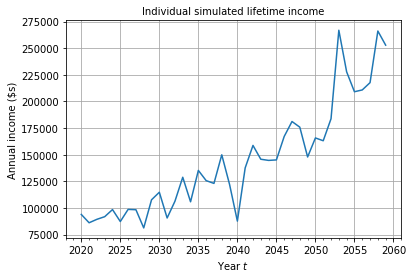

In [4]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

##### (b)

Text(0.5,1,'Income distribution of MACSS students in year 2020')

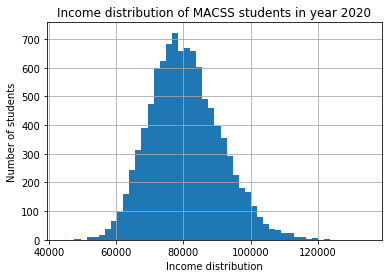

In [5]:
plt.hist(inc_mat[0,:], bins=50)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel("Income distribution")
plt.ylabel("Number of students")
plt.title("Income distribution of MACSS students in year 2020")

In [6]:
#Transform Numpy Arrays Into Useful Dataframe
import pandas as pd

years = np.arange(p['st_year'], p['st_year'] + p['lf_years']).tolist()
df = pd.DataFrame(inc_mat).T
df.columns = years
df = df.T
df['year'] = df.index
df = pd.melt(df, id_vars='year', var_name='id')
df.head()

,year,id,value
0,2020,0,66409.155854
1,2021,0,80020.530203
2,2022,0,75805.266366
3,2023,0,88075.026534
4,2024,0,106861.634158


In [7]:
df_year = df.loc[df['year'] == 2020]
df_year['value'].describe()

count     10000.000000
mean      80653.274318
std       10541.874277
min       43891.472511
25%       73182.442566
50%       79865.114586
75%       87363.900030
max      134596.691453
Name: value, dtype: float64

In [8]:
#Calculate percentile of given earnings
from scipy import stats
percentile_more_than_100000 = 100 - stats.percentileofscore(df_year['value'], 100001, 'strict')
print(percentile_more_than_100000)

4.170000000000002


The percent of my class will earn more than $100,000 in the first year out of the program is 4.17%.

In [9]:
percentile_less_than_70000 = stats.percentileofscore(df_year['value'], 70001, 'strict')
print(percentile_less_than_70000)

15.120000000000001


The percent of my class will earn less than $70,000 in the first year out of the program is 15.1%.

In [10]:
# Check if the distribution normally distributed
stats.normaltest(df_year['value'])

NormaltestResult(statistic=290.481782626689, pvalue=8.369169350300544e-64)

From the normal test with such a small p-value, we believe that the income of MACSS student is normal. It is symmetric and bell-curved.

##### (c)

In [11]:
# Calculate the year of paying off the loan
inc_mat_loan = 0.1 * inc_mat
inc_mat_loan_count = inc_mat_loan.cumsum(axis=0)
df_count = pd.DataFrame(inc_mat_loan_count).T
df_count['payoff_year'] = df_count.apply(lambda x: (x<95000).sum() + 2020, axis=1)
df_count.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,payoff_year
0,6640.915585,14642.968606,22223.495242,31030.997896,41717.161311,52676.693530,61802.183208,72777.802094,81851.561040,90545.655033,...,401320.070822,416826.041658,431634.560790,448494.207843,470080.410935,489583.886535,516852.943054,540006.860475,559796.455676,2030
1,9827.413534,16565.732885,23179.175379,31525.852192,41258.618848,48916.052326,58145.237557,68716.189449,79366.460690,89201.898695,...,370901.093848,385737.661666,404338.083038,428022.431760,448057.333219,470661.887333,492444.060360,512694.975510,529206.485535,2030
2,10193.981110,18649.766736,27795.587041,36777.439151,45797.855445,55903.458803,66055.526545,76675.919178,87577.596683,97206.692550,...,384172.593397,403016.624248,421111.319671,443370.331011,468386.636542,490570.416678,509042.841190,528838.437817,546102.924744,2029
3,10233.704639,18946.540346,27524.243572,37661.664339,47253.827953,57876.950873,68924.709523,79103.893255,88773.587840,97722.872590,...,373251.374256,391183.734099,411393.734102,431922.235539,454122.307209,474466.476564,495085.866389,513470.490072,532248.706033,2029
4,10124.798322,17686.536303,25482.631147,33616.286403,40848.363562,47363.138501,54752.099691,63622.606918,71769.940539,82510.675309,...,398451.017414,420788.974503,438703.481476,458197.910693,477064.734821,490432.584758,509769.914805,530601.811995,547182.885692,2030


In [12]:
# Calculate number of bins by calculate number of unique years
len(df_count['payoff_year'].unique())

5

Text(0.5,1,'Income distribution of MACSS students in year 2020')

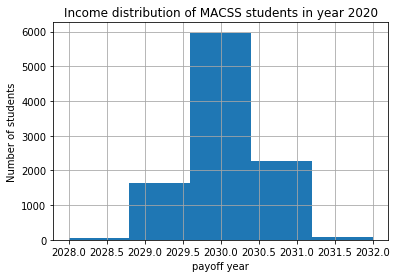

In [13]:
# Plot the histogram of how many years it takes to pay off the loan
plt.hist(df_count['payoff_year'], bins=5)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel("payoff year")
plt.ylabel("Number of students")
plt.title("Income distribution of MACSS students in year 2020")

In [14]:
percentile_10yr = stats.percentileofscore(df_count['payoff_year'], 2030, 'strict')
print(percentile_10yr)

16.78


16.8% percent of the simulations are able to pay off the loan in 10 years.

##### (d)

In [15]:
# New simulation
simulation_profile1 = {
    'inc0'        : 90000,
    'g'           : 0.025,
    'dep'         : 0.4,
    'st_year'     : 2020,
    'lf_years'    : 40,
    'num_draws'   : 10000,
    'sd'          : 0.17
}

inc_mat1 = students_income_sim(simulation_profile1)
print(inc_mat1)

[[ 70550.46142451 117783.33011091 123561.20729139 ... 118483.24080508
   78992.81966812  73764.25171169]
 [ 89615.63768821  71575.56495871  96317.75493523 ...  72778.88084775
   81644.3347736   90400.57899801]
 [ 82955.30101689  69396.06916251 106035.55593099 ...  70956.3661129
  103848.93176006  89949.09077038]
 ...
 [338309.11761165 252187.52025149 203293.03644369 ... 168361.21927259
  308250.29858492 240024.49205936]
 [271061.07048342 227502.32436192 220836.5697397  ... 223095.32811759
  239983.96514044 231788.44418303]
 [219057.46748997 172865.33333479 183245.71710131 ... 295275.8618388
  273090.00167035 253934.86273481]]


In [16]:
# Calculate the year of paying off the loan
inc_mat_loan1 = 0.1 * inc_mat1
inc_mat_loan1_count = inc_mat_loan1.cumsum(axis=0)
df_count1 = pd.DataFrame(inc_mat_loan1_count).T
df_count1['payoff_year'] = df_count1.apply(lambda x: (x<95000).sum()+2020, axis=1)
df_count1.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,payoff_year
0,7055.046142,16016.609911,24312.140013,34333.296161,47140.911566,60278.250807,70538.832110,83501.014229,93530.289712,102941.709379,...,461907.029993,478710.884413,494412.014189,512873.278455,538182.129208,560176.382415,594007.294176,621113.401225,643019.147974,2029
1,11778.333011,18935.889507,25875.496423,35216.582126,46550.888080,54771.198811,65184.514942,77525.312299,89891.909093,100950.693669,...,415136.337440,430997.912532,452152.620044,480946.075180,503903.201069,530578.622378,555797.374404,578547.606840,595834.140173,2029
2,12356.120729,21987.896223,32591.451816,42872.807107,53134.720879,64949.829434,76745.318015,89161.647500,101911.366268,112667.740724,...,435560.458455,457244.366269,477650.088915,504198.845312,534890.908317,560918.860780,581248.164425,603331.821399,621656.393109,2028
3,12419.122357,22435.567638,32186.140501,44230.528342,55351.190956,67963.700504,81138.195166,92884.345976,103783.561489,113557.846084,...,418926.251938,439248.634289,462828.475331,486711.019972,512965.151441,536207.314368,559680.244528,579728.470866,600181.868244,2028
4,12246.576993,20568.831331,29174.187992,38204.750454,45891.409034,52545.816626,60331.417932,70143.066774,78854.839154,91263.186075,...,457203.348438,484288.814926,504429.220114,526750.916183,547973.678153,561394.580288,582977.478421,606584.965040,623966.797805,2030


In [17]:
# Calculate number of bins by calculate number of unique years
len(df_count1['payoff_year'].unique())

7

Text(0.5,1,'Income distribution of MACSS students in year 2020')

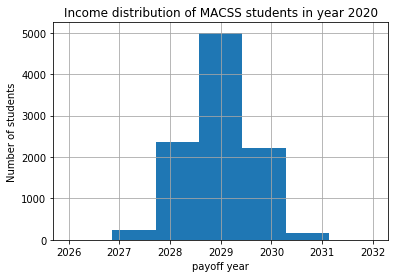

In [18]:
# Plot the histogram of how many years it takes to pay off the loan
plt.hist(df_count1['payoff_year'], bins=7)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel("payoff year")
plt.ylabel("Number of students")
plt.title("Income distribution of MACSS students in year 2020")

In [19]:
percentile_10yr1 = stats.percentileofscore(df_count1['payoff_year'], 2030, 'strict')
print(percentile_10yr1)

76.02


76.0%percent of the simulations are able to pay off the loan in 10 years.